In [34]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import librosa.display
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from pyAudioAnalysis.MidTermFeatures import directory_feature_extraction as dW

In [35]:
# Paths for training and test data
train_csv_path =  'Dataset 8k\\train.csv'
train_audio_dir = 'Dataset 8k\\Train'
test_csv_path = 'Dataset 8k\\test.csv'
test_audio_dir = 'Dataset 8k\\Test'
#output_csv = 'AUDIO FILES\\test\\test_predictions.csv'

In [40]:
def explore_data(csv_path, audio_dir, num_samples=5):
        """
        Performs exploratory analysis on the audio data.

        Args:
            csv_path (str): Path to the CSV file.
            audio_dir (str): Directory containing audio files.
            num_samples (int): Number of samples to visualize per class.
        """
        # Load the data
        train_data = pd.read_csv(csv_path)

        # Display basic information about the dataset
        print("Dataset information:")
        print(train_data.info())
        
        # Display class distribution
        print("\nClass distribution:")
        class_distribution = train_data['Class'].value_counts()
        print(class_distribution)
        
        # Generate colors from the 'jet' colormap
        color_palette = plt.cm.jet(np.linspace(0, 1, len(class_distribution)))

        # Plot class distribution
        plt.figure(figsize=(10, 10))
        ax1 = plt.subplot(2, 1, 1)
        class_distribution.plot(kind='bar', color=color_palette, ax=ax1)
        plt.title('Class Distribution')
        plt.xlabel('Classes')
        plt.ylabel('Count')
        plt.xticks(rotation=90)
        plt.tight_layout()
        for i, count in enumerate(class_distribution):
            ax1.text(i, count + 10, str(count), ha='center')
        manager = plt.get_current_fig_manager()
        # manager.window.geometry("+{}+{}".format(0, 0))  # Spawn to top left corner
        plt.pause(0.1)  # Pause to allow the window to be positioned correctly
        plt.show()
        
        # Duration distribution of audio files
        durations = []
        for idx, row in train_data.iterrows():
            file_path = os.path.join(audio_dir, str(row['ID']) + '.wav')
            y, sr = librosa.load(file_path, sr=None)
            duration = librosa.get_duration(y=y, sr=sr)
            durations.append(duration)

        plt.figure(figsize=(10, 7))
        sns.histplot(durations, bins=30)
        plt.title('Duration Distribution of Audio Files')
        plt.xlabel('Duration (s)')
        plt.ylabel('Count')
        plt.tight_layout()
        manager = plt.get_current_fig_manager()
        # manager.window.geometry("+{}+{}".format(0, 0))  # Spawn to top left corner
        plt.pause(0.1)
        plt.show()

        # # Visualize MFCC features for a few samples from each class
        # classes = train_data['Class'].unique()
        # plt.figure(figsize=(16, 8))
        # for i, cls in enumerate(classes):
        #     plt.subplot(3, 4, i + 1)
        #     plt.title(cls)
        #     class_samples = train_data[train_data['Class'] == cls].sample(num_samples)
        #     for _, row in class_samples.iterrows():
        #         file_path = os.path.join(audio_dir, str(row['ID']) + '.wav')
        #         y, sr = librosa.load(file_path, sr=None)
        #         mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
        #         librosa.display.specshow(mfcc, sr=sr, x_axis='time')
        #         plt.ylabel('MFCC Coefficients')
        #         plt.xlabel('Time')
        # plt.tight_layout()
        # manager = plt.get_current_fig_manager()
        # # manager.window.geometry("+{}+{}".format(0, 0))  # Spawn to top left corner
        # plt.pause(0.1)
        # plt.show()

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5435 entries, 0 to 5434
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      5435 non-null   int64 
 1   Class   5435 non-null   object
dtypes: int64(1), object(1)
memory usage: 85.1+ KB
None

Class distribution:
Class
jackhammer          668
engine_idling       624
siren               607
street_music        600
drilling            600
dog_bark            600
children_playing    600
air_conditioner     600
car_horn            306
gun_shot            230
Name: count, dtype: int64


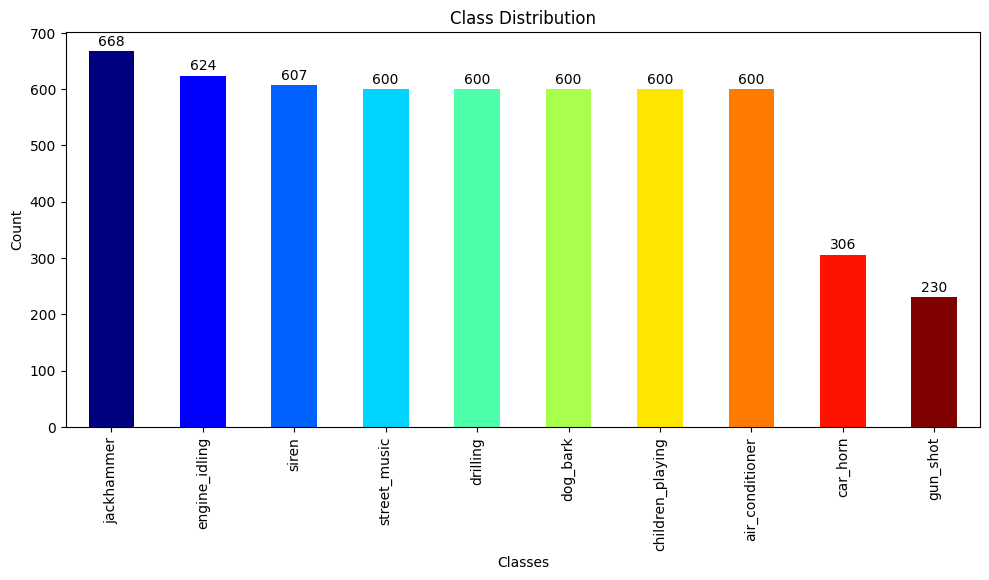

C:\Users\giorg\AppData\Local\Temp\ipykernel_4288\1598188635.py:45: UserWarning:

PySoundFile failed. Trying audioread instead.

c:\Users\giorg\OneDrive\Υπολογιστής\DL Project\dlenv\Lib\site-packages\librosa\core\audio.py:183: FutureWarning:

librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.



FileNotFoundError: [Errno 2] No such file or directory: 'Dataset 8k\\Train\\0.wav'

In [41]:
explore_data(train_csv_path, train_audio_dir)

In [ ]:
import numpy as np, plotly, plotly.graph_objs as go
from pyAudioAnalysis.MidTermFeatures import directory_feature_extraction as dW
import pandas as pd
import os
import shutil
from pyAudioAnalysis import utilities

# Define paths
csv_file = "C:\\Users\\giorg\\OneDrive\\Υπολογιστής\\DL Project\\Dataset 8k\\train.csv"
folder_path = "C:\\Users\\giorg\\OneDrive\\Υπολογιστής\\DL Project\\Dataset 8k\\Train"

# Read CSV file into pandas DataFrame
df = pd.read_csv(csv_file)

# Iterate through each row in the DataFrame
for index, row in df.iterrows():
    file_id = str(row['ID']) + ".wav"  # Construct the WAV file name from ID
    category = row['Class']  # Get the category
    
    # Check if the WAV file exists
    if os.path.exists(os.path.join(folder_path, file_id)):
        # Create folder if it doesn't exist
        category_folder = os.path.join(folder_path, category)
        if not os.path.exists(category_folder):
            os.makedirs(category_folder)
        
        # Move the WAV file to the corresponding category folder
        shutil.move(os.path.join(folder_path, file_id), os.path.join(category_folder, file_id))
        print(f"Moved {file_id} to {category} folder.")
    else:
        print(f"File {file_id} not found.")

print("Task completed.")

In [10]:
name_1, name_2 = "mfcc_3_std", "energy_entropy_mean"

In [11]:
#Extract Features exapmle for 2 folders
f1, _, fn1, = dW(f"C:\\Users\\giorg\\OneDrive\\Υπολογιστής\\DL Project\\Dataset 8k\\Train\\children_playing", 1, 1, 0.1, 0.1)
f2, _, fn2, = dW(f"C:\\Users\\giorg\\OneDrive\\Υπολογιστής\\DL Project\\Dataset 8k\\Train\\drilling", 1, 1, 0.1, 0.1)
f3, _, fn3, = dW(f"C:\\Users\\giorg\\OneDrive\\Υπολογιστής\\DL Project\\Dataset 8k\\Train\\street_music", 1, 1, 0.1, 0.1)
f4, _, fn4, = dW(f"C:\\Users\\giorg\\OneDrive\\Υπολογιστής\\DL Project\\Dataset 8k\\Train\\gun_shot", 1, 1, 0.1, 0.1)

Analyzing file 1 of 600: C:\Users\giorg\OneDrive\Υπολογιστής\DL Project\Dataset 8k\Train\children_playing\1014.wav
Analyzing file 2 of 600: C:\Users\giorg\OneDrive\Υπολογιστής\DL Project\Dataset 8k\Train\children_playing\1022.wav
Analyzing file 3 of 600: C:\Users\giorg\OneDrive\Υπολογιστής\DL Project\Dataset 8k\Train\children_playing\1024.wav
Analyzing file 4 of 600: C:\Users\giorg\OneDrive\Υπολογιστής\DL Project\Dataset 8k\Train\children_playing\1027.wav
Analyzing file 5 of 600: C:\Users\giorg\OneDrive\Υπολογιστής\DL Project\Dataset 8k\Train\children_playing\1040.wav
Analyzing file 6 of 600: C:\Users\giorg\OneDrive\Υπολογιστής\DL Project\Dataset 8k\Train\children_playing\1051.wav
Analyzing file 7 of 600: C:\Users\giorg\OneDrive\Υπολογιστής\DL Project\Dataset 8k\Train\children_playing\1054.wav
Analyzing file 8 of 600: C:\Users\giorg\OneDrive\Υπολογιστής\DL Project\Dataset 8k\Train\children_playing\1056.wav
Analyzing file 9 of 600: C:\Users\giorg\OneDrive\Υπολογιστής\DL Project\Dataset 

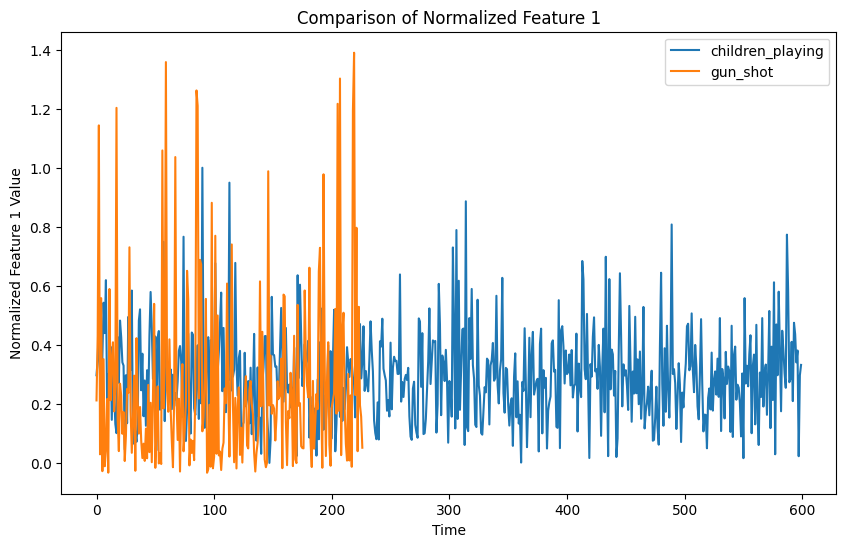

In [24]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Normalize the features
scaler = MinMaxScaler()
f1_normalized = scaler.fit_transform(f1)
f2_normalized = scaler.transform(f2)    
f3_normalized = scaler.transform(f3)
f4_normalized = scaler.transform(f4)

# Plot the first 5 features in separate plots
num_features = 5
for i in range(num_features):
    plt.figure(figsize=(20, 10))
    plt.plot(f1_normalized[50:100, i], label='children_playing')
    plt.plot(f2_normalized[50:100, i], label='drilling')
    plt.plot(f3_normalized[50:100, i], label='street_music')
    plt.plot(f4_normalized[50:100, i], label='gun_shot')
    plt.xlabel('Time')
    plt.ylabel(f'Normalized Feature {i+1} Value')
    plt.title(f'Comparison of Normalized Feature {i+1}')
    plt.legend()
    plt.show()



In [25]:
import numpy as np
import plotly.graph_objs as go

# Concatenate features to extract overall mean and std
f1 = np.array([f1[:, fn1.index(name_1)], f1[:, fn1.index(name_2)]]).T
f4 = np.array([f4[:, fn1.index(name_1)], f4[:, fn1.index(name_2)]]).T
f = np.concatenate((f1, f4), axis=0)
mean, std = f.mean(axis=0), np.std(f, axis=0)

# Normalize features
f1 = (f1 - mean) / std
f4 = (f4 - mean) / std
f = (f - mean) / std

# Plot selected 2D features using Plotly
plt1 = go.Scatter(x=f1[:, 0], y=f1[:, 1], mode='markers', name="CHILDREN PLAYING")
plt2 = go.Scatter(x=f4[:, 0], y=f4[:, 1], mode='markers', name="GUN SHOT")


array([[7.26922275e-02, 1.94893022e-02, 2.96571330e+00, ...,
        1.03084904e-03, 8.57142857e+01, 6.66666642e-01],
       [1.29150601e-01, 3.43341165e-02, 3.27448867e+00, ...,
        1.39658098e-02, 5.00000000e+01, 2.38095236e-01],
       [2.18330554e-01, 4.33839246e-02, 3.27814506e+00, ...,
        5.10068385e-03, 1.50000000e+02, 1.05263157e-01],
       ...,
       [4.60705375e-02, 2.54438879e-02, 3.11188705e+00, ...,
        6.18838664e-02, 6.00000000e+02, 0.00000000e+00],
       [1.60931638e-01, 3.80168811e-02, 3.29310948e+00, ...,
        2.11009712e-03, 1.20000000e+02, 1.24999999e-01],
       [8.55352688e-02, 4.02745129e-02, 3.28928978e+00, ...,
        1.23959773e-03, 7.50000000e+01, 1.24999999e-01]])